In [1]:
import requests
import numpy as np
import time
import datetime as dt
import pandas as pd
from sodapy import Socrata
from config import la_county_api, la_county_secret_api, la_county_password, dol_api
import matplotlib.pyplot as plt

In [2]:
client = Socrata('data.lacounty.gov',
                 la_county_api,
                 username="beauwbatchelor@gmail.com",
                 password=la_county_password)
cpi_table = pd.read_csv('../../data/CPI.csv')
cpi_year = {}
for i in range(len(cpi_table)):
    year = str(cpi_table['YEAR'][i])
    year_percent = {year : float(cpi_table['PERCENT'][i])}
    cpi_year.update(year_percent)

In [3]:
results = client.get("mdji-9cym", usecodedescchar2 ='Four Units  (Any Combination)', where = 'sqftmain > 0', limit=5000)

In [4]:
results_df = pd.DataFrame.from_records(results)

In [5]:
# results_df.to_csv('../../data/la_county2.csv', index=False)

In [6]:
type_list = []
sqft_value_list = []
cpi_total_adj = []

for i, row in results_df.iterrows():
    year = row['rollyear']
    cpi_adjusted_value = int(row['roll_totalvalue'])+(int(row['roll_totalvalue']) * cpi_year[year])
    cpi_total_adj.append(cpi_adjusted_value)
    sqft_value_list.append(cpi_adjusted_value / int(row['sqftmain']))
    prop_type = row['situszip5']
    if prop_type not in type_list:
        type_list.append(prop_type)
        
results_df['sqft_value'] = sqft_value_list
results_df['cpi_total_adj'] = cpi_total_adj

In [7]:
prices_by_zip = {}
for i in range(len(type_list)):
    zip_code = type_list[i]
    zip_prices = {zip_code : []}
    for key, row in results_df.iterrows():
        row_zip = row['situszip5']
        if row_zip == zip_code:
            zip_prices[zip_code].append(int(row['sqft_value']))
    prices_by_zip.update(zip_prices)
            

In [8]:
for zip in prices_by_zip.keys():
    print(zip, len(prices_by_zip[zip]))

90057 61
90035 1
90066 1
90045 1
90026 165
90017 9
90004 4
90012 5
nan 0
90033 304
90063 208
90023 192
91801 5
91754 54
90031 173
90032 105
90022 184
90040 14
91755 17
91732 863
91506 12
91733 1376
91502 1
91504 7
91505 24
91746 16
90660 30
90601 994
90606 46
90602 127


In [10]:
chart_list = prices_by_zip['91733']

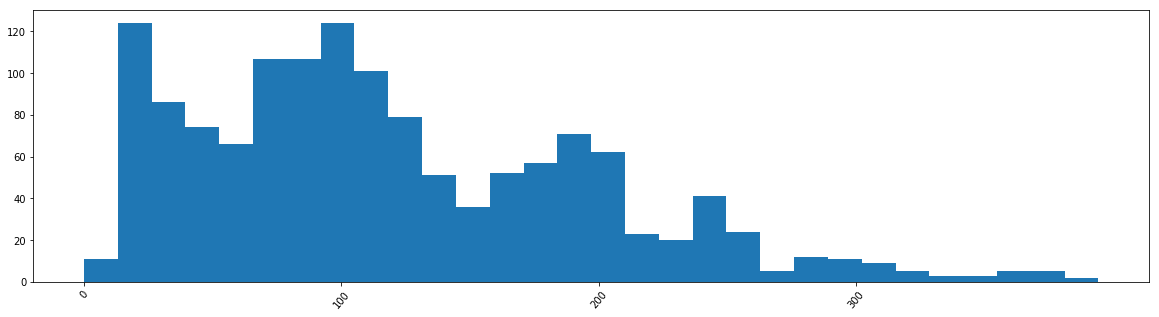

119.90116279069767 76.50657631588379


In [14]:
# bin_num = int(len(chart_list)/5)
bin_num = 30

plt.figure(num = 1, figsize=(20,5))
plt.hist(chart_list,bins=bin_num)
plt.xticks(np.arange(min(chart_list), max(chart_list), 100), rotation=50)
plt.show()
print(np.mean(chart_list), np.std(chart_list))

In [ ]:
prices_by_zip